## import packages

In [1]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Download dataset and Visualize

In [2]:
transform = transforms.ToTensor()

Train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
Test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


# Visualize the distribution of the data and the images

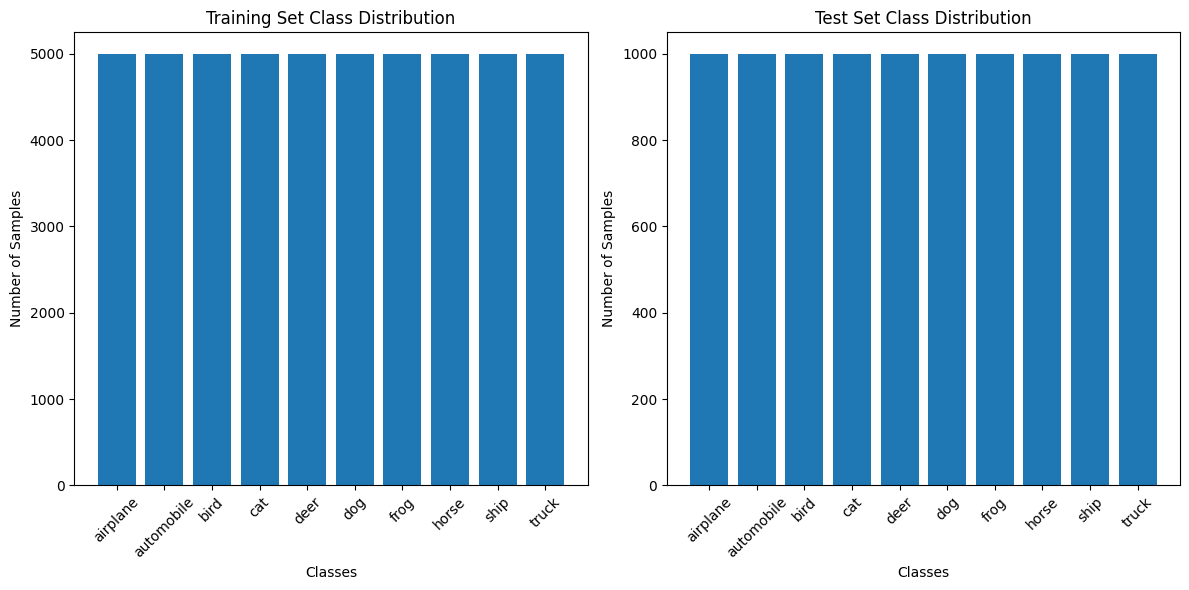

In [17]:
# Visualize the distribution of train dataset
# The CIFAR-10 dataset consists of 
# 60000 32x32 colour images
# 10 classes, 
# 6000 images per class.

# Init class
Train_class_counts = {i: 0 for i in range(10)}
Test_class_counts = {i: 0 for i in range(10)}
for _, label in Train_dataset:
    Train_class_counts[label] += 1
for _, label in Test_dataset:
    Test_class_counts[label] += 1    

# Visualization
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train class distribution
axes[0].bar(class_labels, list(Train_class_counts.values()))
axes[0].set_title('Training Set Class Distribution')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=45)

# Test class distribution
axes[1].bar(class_labels, list(Test_class_counts.values()))
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

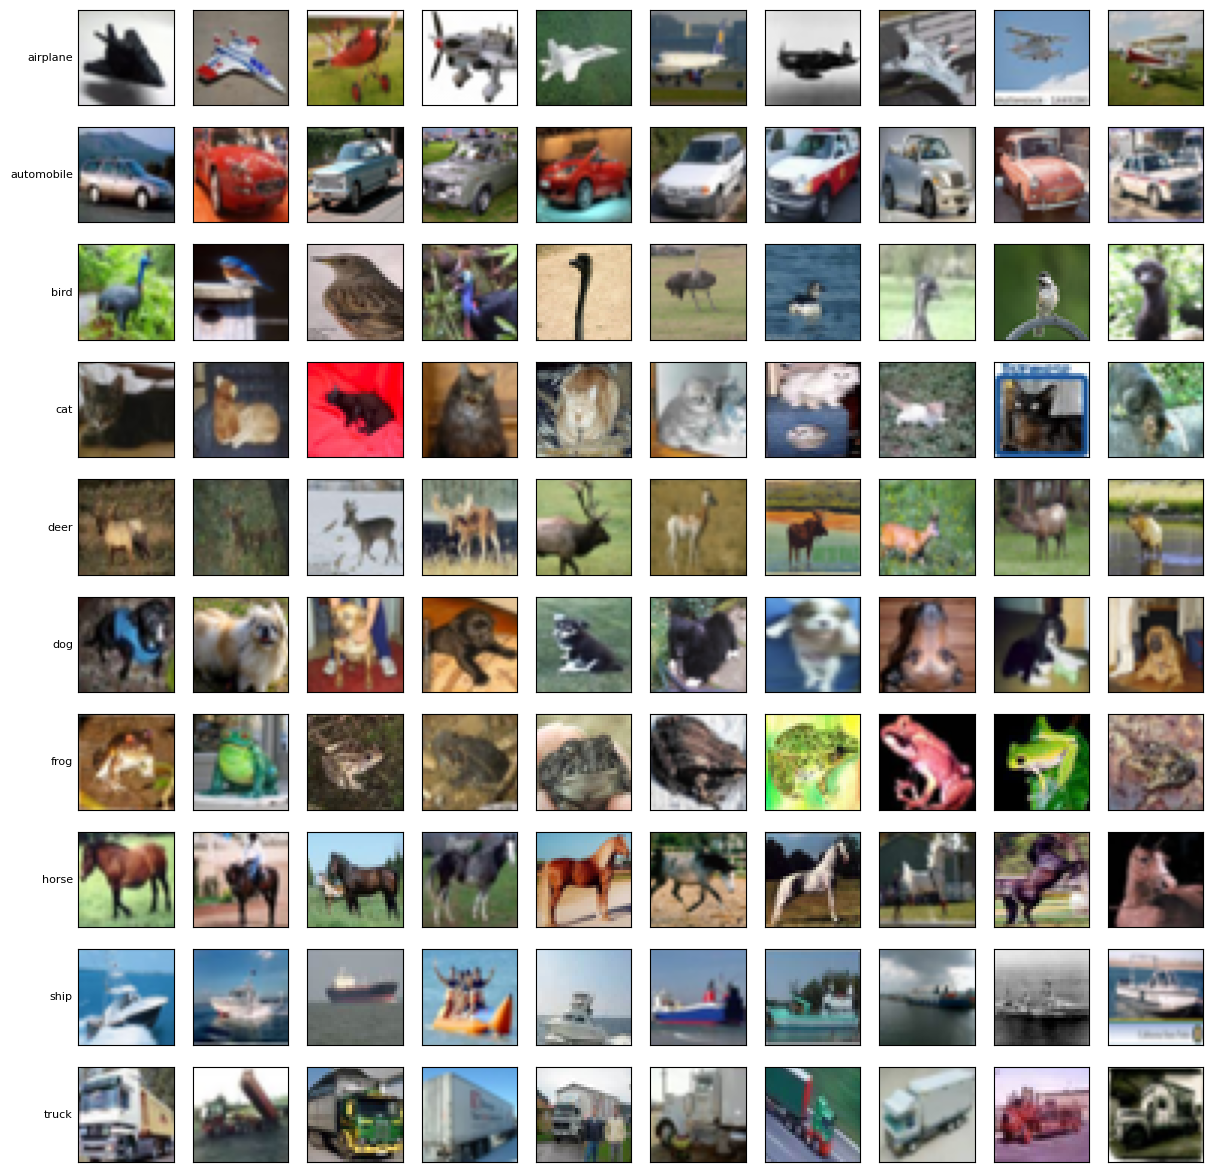

In [ ]:
# store images by class
Train_class_images = {i: [] for i in range(10)}
for img, label in Train_dataset:
    Train_class_images[label].append(img)

# visualize 10 images per class
num_images = 10
fig, axes = plt.subplots(10, num_images, figsize=(15, 15))

# Set y axis labels
y_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    for j in range(num_images):
        img = np.transpose(Train_class_images[i][j].numpy(), (1, 2, 0))
        axes[i, j].imshow(img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
    axes[i, 0].set_ylabel(y_labels[i], rotation=0, ha='right', va='center', fontsize=8)

plt.show()


# Implement Nearest Neighbor Classifier

In [3]:
# transform data
# Train data
train_images = []
train_labels = []

for img, label in Train_dataset:
    train_images.append(img.numpy().flatten())
    train_labels.append(label)
    
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images_tensor = torch.tensor(train_images)

# Test data
test_images = []
test_labels = []

for img, label in Test_dataset:
    test_images.append(img.numpy().flatten())
    test_labels.append(label)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images_tensor = torch.tensor(test_images)

In [8]:
print(train_images.shape)
print(train_images_tensor.shape)

(50000, 3072)
torch.Size([50000, 3072])


In [4]:
# Nearest Neighbor classifier
# 1. Compute Euclidean distance between train_images and test images.
# 2. Find the closest index of train_image
# 3. Predict test images' label with train images
def NN_classifier(train_images, train_labels, test_images):
    predictions =[]
    for test_image in test_images:
        # 1.Compute one test image with all train images.
        # train_images.shape = (50000, 3072)
        distances = np.sqrt(np.sum((train_images - test_image) ** 2, axis=1))
        # 2. Find the closest index of train image.
        nearest_index = np.argmin(distances)
        # 3. predict test image's label by nearest index of train image.
        prediction = train_labels[nearest_index]
        
        predictions.append(prediction)
    return np.array(predictions)

# Accelerate the process by cdist
def NN_classifier_cdist(train_images_tensor, train_labels, test_images_tensor):
    distances = torch.cdist(test_images_tensor, train_images_tensor)
    nearest_indices = torch.argmin(distances, dim=1)
    predictions = train_labels[nearest_indices]
    return np.array(predictions)
        

In [6]:
predictions = NN_classifier_cdist(train_images_tensor, train_labels, test_images_tensor)

accuracy = np.mean(predictions == test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 35.39%
